# COGS 108 FINAL PROJECT

This notebook will explore the salary of SF workers in the government sector, and help us understand how these salaries have grown relative to each other, as well as relative to COA, inflation, and general economic growth.

This dataset will come from the years of 2011 - 2014, and will reflect the years post economic downturn from the 2008 recession.

In [4]:
import pandas as pd
import seaborn
import matplotlib as mpl
import numpy as np
import re
import matplotlib.pyplot as plt

We'll need to import the data collected from these Government-related jobs from 2011 - 2014 from the Dataset from Kaggle.

In [5]:
salary_df = pd.read_csv("Salaries.csv", dtype={'JobTitle': 'object', "BasePay": 'object', "Overtime": 'object', 'Otherpay': 'object', 'Agency': 'object'})

C:\Users\cheng\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
#Load additional years of data
salary_2015 = pd.read_csv("san-francisco-2015.csv", dtype={'JobTitle': 'object', "BasePay": 'object', "Overtime": 'object', 'Otherpay': 'object', 'Agency': 'object'})
salary_2015 = salary_2015.drop(columns=['EmployeeName'])
salary_2015['JobTitle'] = salary_2015['JobTitle'].str.upper()

salary_2016 = pd.read_csv("san-francisco-2016.csv", dtype={'JobTitle': 'object', "BasePay": 'object', "Overtime": 'object', 'Otherpay': 'object', 'Agency': 'object'})
salary_2016 = salary_2016.drop(columns=['EmployeeName'])
salary_2016['JobTitle'] = salary_2016['JobTitle'].str.upper()

salary_2017 = pd.read_csv("san-francisco-2017.csv", dtype={'JobTitle': 'object', "BasePay": 'object', "Overtime": 'object', 'Otherpay': 'object', 'Agency': 'object'})
salary_2017 = salary_2017.drop(columns=['EmployeeName'])
salary_2017['JobTitle'] = salary_2017['JobTitle'].str.upper()

We'll also want to clean up this data in regards to safe harbor; this will require us to remove the name of the employee, as well as the agency of each person; conviently, all agencies are in San Francisco, as it is the area we are taking a look at.

In [7]:
salary_df = salary_df.drop(columns=['EmployeeName'])

In [8]:
#print(salary_df.loc[10])

In [9]:
#print(salary_df['JobTitle'].value_counts())
#salary_df['JobTitle'].unique()

Lets try to even out the data by stripping out anything within parenthesis to clear up and duplicates

In [15]:
salary_df['JobTitle'] = salary_df['JobTitle'].str.upper()
print(salary_df['Year'])
salary_df
#salary_df['JobTitle'].value_counts()

0         2011
1         2011
2         2011
3         2011
4         2011
5         2011
6         2011
7         2011
8         2011
9         2011
10        2011
11        2011
12        2011
13        2011
14        2011
15        2011
16        2011
17        2011
18        2011
19        2011
20        2011
21        2011
22        2011
23        2011
24        2011
25        2011
26        2011
27        2011
28        2011
29        2011
          ... 
148624    2014
148625    2014
148626    2014
148627    2014
148628    2014
148629    2014
148630    2014
148631    2014
148632    2014
148633    2014
148634    2014
148635    2014
148636    2014
148637    2014
148638    2014
148639    2014
148640    2014
148641    2014
148642    2014
148643    2014
148644    2014
148645    2014
148646    2014
148647    2014
148648    2014
148649    2014
148650    2014
148651    2014
148652    2014
148653    2014
Name: Year, Length: 148654, dtype: int64


,Id,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,CAPTAIN III (POLICE DEPARTMENT),155966.02,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.7,198307,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182235,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
5,6,ASSISTANT DEPUTY CHIEF II,118602.0,8601,189083,NaN,316285.74,316285.74,2011,NaN,San Francisco,NaN
6,7,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.9,134426,NaN,315981.05,315981.05,2011,NaN,San Francisco,NaN
7,8,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0,51322.5,NaN,307899.46,307899.46,2011,NaN,San Francisco,NaN
8,9,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.7,40132.2,NaN,303427.55,303427.55,2011,NaN,San Francisco,NaN
9,10,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.0,0,17115.7,NaN,302377.73,302377.73,2011,NaN,San Francisco,NaN


In [30]:
#Seperate Dataframes into yearly parts (2011, 2012, 2013, 2014)
salary_2011 = salary_df[salary_df['Year'] == 2011]
salary_2012 = salary_df[salary_df['Year'] == 2012]
salary_2013 = salary_df[salary_df['Year'] == 2013]
salary_2014 = salary_df[salary_df['Year'] == 2014]


,Id,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,CAPTAIN III (POLICE DEPARTMENT),155966.02,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.7,198307,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182235,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
5,6,ASSISTANT DEPUTY CHIEF II,118602.0,8601,189083,NaN,316285.74,316285.74,2011,NaN,San Francisco,NaN
6,7,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.9,134426,NaN,315981.05,315981.05,2011,NaN,San Francisco,NaN
7,8,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0,51322.5,NaN,307899.46,307899.46,2011,NaN,San Francisco,NaN
8,9,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.7,40132.2,NaN,303427.55,303427.55,2011,NaN,San Francisco,NaN
9,10,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.0,0,17115.7,NaN,302377.73,302377.73,2011,NaN,San Francisco,NaN


In [ ]:
#print(salary_2011[salary_2011['JobTitle'] == "CLERK"].index)

Lets drop any counts where the job count is below 30, for clarity sake.

In [38]:
# Find any Job titles and drop them if they are less <30
salary_2011 = salary_2011.groupby('JobTitle').filter(lambda x: len(x) > 30)
salary_2012 = salary_2012.groupby('JobTitle').filter(lambda x: len(x) > 30)
salary_2013 = salary_2013.groupby('JobTitle').filter(lambda x: len(x) > 30)
salary_2014 = salary_2014.groupby('JobTitle').filter(lambda x: len(x) > 30)
salary_2015 = salary_2015.groupby('JobTitle').filter(lambda x: len(x) > 30)
salary_2016 = salary_2016.groupby('JobTitle').filter(lambda x: len(x) > 30)
salary_2017 = salary_2017.groupby('JobTitle').filter(lambda x: len(x) > 30)


TRANSIT OPERATOR                             2388
SPECIAL NURSE                                1402
REGISTERED NURSE                             1219
CUSTODIAN                                     796
FIREFIGHTER                                   794
POLICE OFFICER III                            779
RECREATION LEADER                             692
DEPUTY SHERIFF                                685
MENTAL HEALTH REHABILITATION WORKER           559
PUBLIC SERVICE AIDE-SPECIAL PROGRAMS          531
POLICE OFFICER I                              467
GENERAL LABORER                               377
ATTORNEY (CIVIL/CRIMINAL)                     377
PORTER                                        370
POLICE OFFICER II                             361
PUBLIC SERVICE TRAINEE                        328
SENIOR CLERK TYPIST                           310
SENIOR ELIGIBILITY WORKER                     308
LIBRARY PAGE                                  308
FIRE FIGHTER PARAMEDIC                        301


In [ ]:
#salary_2011["JobTitle"].value_counts().index.tolist()
#print("POLICE" in "POLICE OFFICER")

We'll go ahead and now sort the thousands of jobs into a few catagories to make viewing and calculations easier

In [72]:
def find_job_title(row):
    
    police_title = ['police', 'sherif', 'probation', 'sergeant', 'officer', 'lieutenant']
    fire_title = ['fire']
    transit_title = ['mta', 'transit']
    medical_title = ['anesth', 'medical', 'nurs', 'health', 'physician', 'orthopedic', 'pharm', 'care']
    court_title = ['court', 'legal']
    automotive_title = ['automotive', 'mechanic', 'truck']
    engineer_title = ['engineer', 'engr', 'eng', 'program']
    general_laborer_title = ['general laborer', 'painter', 'inspector', 'carpenter', 'electrician', 'plumber', 'maintenance']
    aide_title = ['aide', 'assistant', 'secretary', 'attendant']
    
    for title in police_title:
        if title in row.lower():
            return 'police'    
    for title in fire_title:
        if title in row.lower():
            return 'fire'
    for title in aide_title:
        if title in row.lower():
            return 'assistant'
    for title in transit_title:
        if title in row.lower():
            return 'transit'
    for title in medical_title:
        if title in row.lower():
            return 'medical'
    if 'airport' in row.lower():
        return 'airport'
    if 'worker' in row.lower():
        return 'social worker'
    if 'architect' in row.lower():
        return 'architect'
    for title in court_title:
        if title in row.lower():
            return 'court'
    if 'major' in row.lower():
        return 'mayor'
    if 'librar' in row.lower():
        return 'library'
    if 'guard' in row.lower():
        return 'guard'
    if 'public' in row.lower():
        return 'public works'
    if 'attorney' in row.lower():
        return 'attorney'
    if 'custodian' in row.lower():
        return 'custodian'
    if 'account' in row.lower():
        return 'account'
    if 'garden' in row.lower():
        return 'gardener'
    if 'recreation' in row.lower():
        return 'recreation leader'
    for title in automotive_title:
        if title in row.lower():
            return 'automotive'
    for title in engineer_title:
        if title in row.lower():
            return 'engineer'
    for title in general_laborer_title:
        if title in row.lower():
            return 'general laborer'
    if 'food serv' in row.lower():
        return 'food service'
    if 'clerk' in row.lower():
        return 'clerk'
    if 'porter' in row.lower():
        return 'porter' 
    if 'analy' in row.lower():
        return 'analyst'
    if 'manager' in row.lower():
        return 'manager'
    else:
        return 'other'

salary_2011["Job_Group"]=salary_2011["JobTitle"].map(find_job_title)
salary_2012["Job_Group"]=salary_2012["JobTitle"].map(find_job_title)
salary_2013["Job_Group"]=salary_2013["JobTitle"].map(find_job_title)
salary_2014["Job_Group"]=salary_2014["JobTitle"].map(find_job_title)
salary_2015["Job_Group"]=salary_2015["JobTitle"].map(find_job_title)
salary_2016["Job_Group"]=salary_2016["JobTitle"].map(find_job_title)
salary_2017["Job_Group"]=salary_2017["JobTitle"].map(find_job_title)


C:\Users\cheng\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,Job_Group
3,SHERIFF'S LIEUTENANT,176590.01,273076.56,32145.23,64428.26,481811.80,546240.06,2017,NaN,San Francisco,FT,police
6,TRANSIT OPERATOR,358471.39,1620.94,819.02,105695.90,360911.35,466607.25,2017,NaN,San Francisco,FT,transit
9,SENIOR PHYSICIAN SPECIALIST,245512,0.00,119866.80,71393.73,365378.80,436772.53,2017,NaN,San Francisco,FT,medical
13,SENIOR DEPUTY SHERIFF,117892,222617.45,19097.97,53713.63,359607.42,413321.05,2017,NaN,San Francisco,FT,police
18,SENIOR DEPUTY SHERIFF,117892.01,206214.58,25784.55,54107.84,349891.14,403998.98,2017,NaN,San Francisco,FT,police
19,DEPUTY SHERIFF,106349.01,218918.93,25003.02,51810.87,350270.96,402081.83,2017,NaN,San Francisco,FT,police
21,DEPUTY SHERIFF,106349.01,208888.33,24662.27,50897.44,339899.61,390797.05,2017,NaN,San Francisco,FT,police
23,SENIOR DEPUTY SHERIFF,117892,205982.45,14819.52,51052.75,338693.97,389746.72,2017,NaN,San Francisco,FT,police
24,DEPUTY SHERIFF,106349.01,213837.64,17742.83,50096.71,337929.48,388026.19,2017,NaN,San Francisco,FT,police
28,SENIOR DEPUTY SHERIFF,118672.33,180213.85,23025.48,56768.89,321911.66,378680.55,2017,NaN,San Francisco,FT,police


Lets generate averages and new dataframes for the departmental data

In [104]:
jobgroups = salary_2017['Job_Group'].unique()
average_jobgroups2011 = [] 
average_jobgroups2012 = [] 
average_jobgroups2013 = [] 
average_jobgroups2014 = [] 
average_jobgroups2015 = [] 
average_jobgroups2016 = [] 
average_jobgroups2017 = [] 
for i in jobgroups: 
    average_jobgroups2011.append(salary_2011[salary_2011['Job_Group'] == i]['TotalPay'].mean())
    average_jobgroups2012.append(salary_2012[salary_2012['Job_Group'] == i]['TotalPay'].mean())
    average_jobgroups2013.append(salary_2013[salary_2013['Job_Group'] == i]['TotalPay'].mean())
    average_jobgroups2014.append(salary_2014[salary_2014['Job_Group'] == i]['TotalPay'].mean())
    average_jobgroups2015.append(salary_2015[salary_2015['Job_Group'] == i]['TotalPay'].mean())
    average_jobgroups2016.append(salary_2016[salary_2016['Job_Group'] == i]['TotalPay'].mean())
    average_jobgroups2017.append(salary_2017[salary_2017['Job_Group'] == i]['TotalPay'].mean())

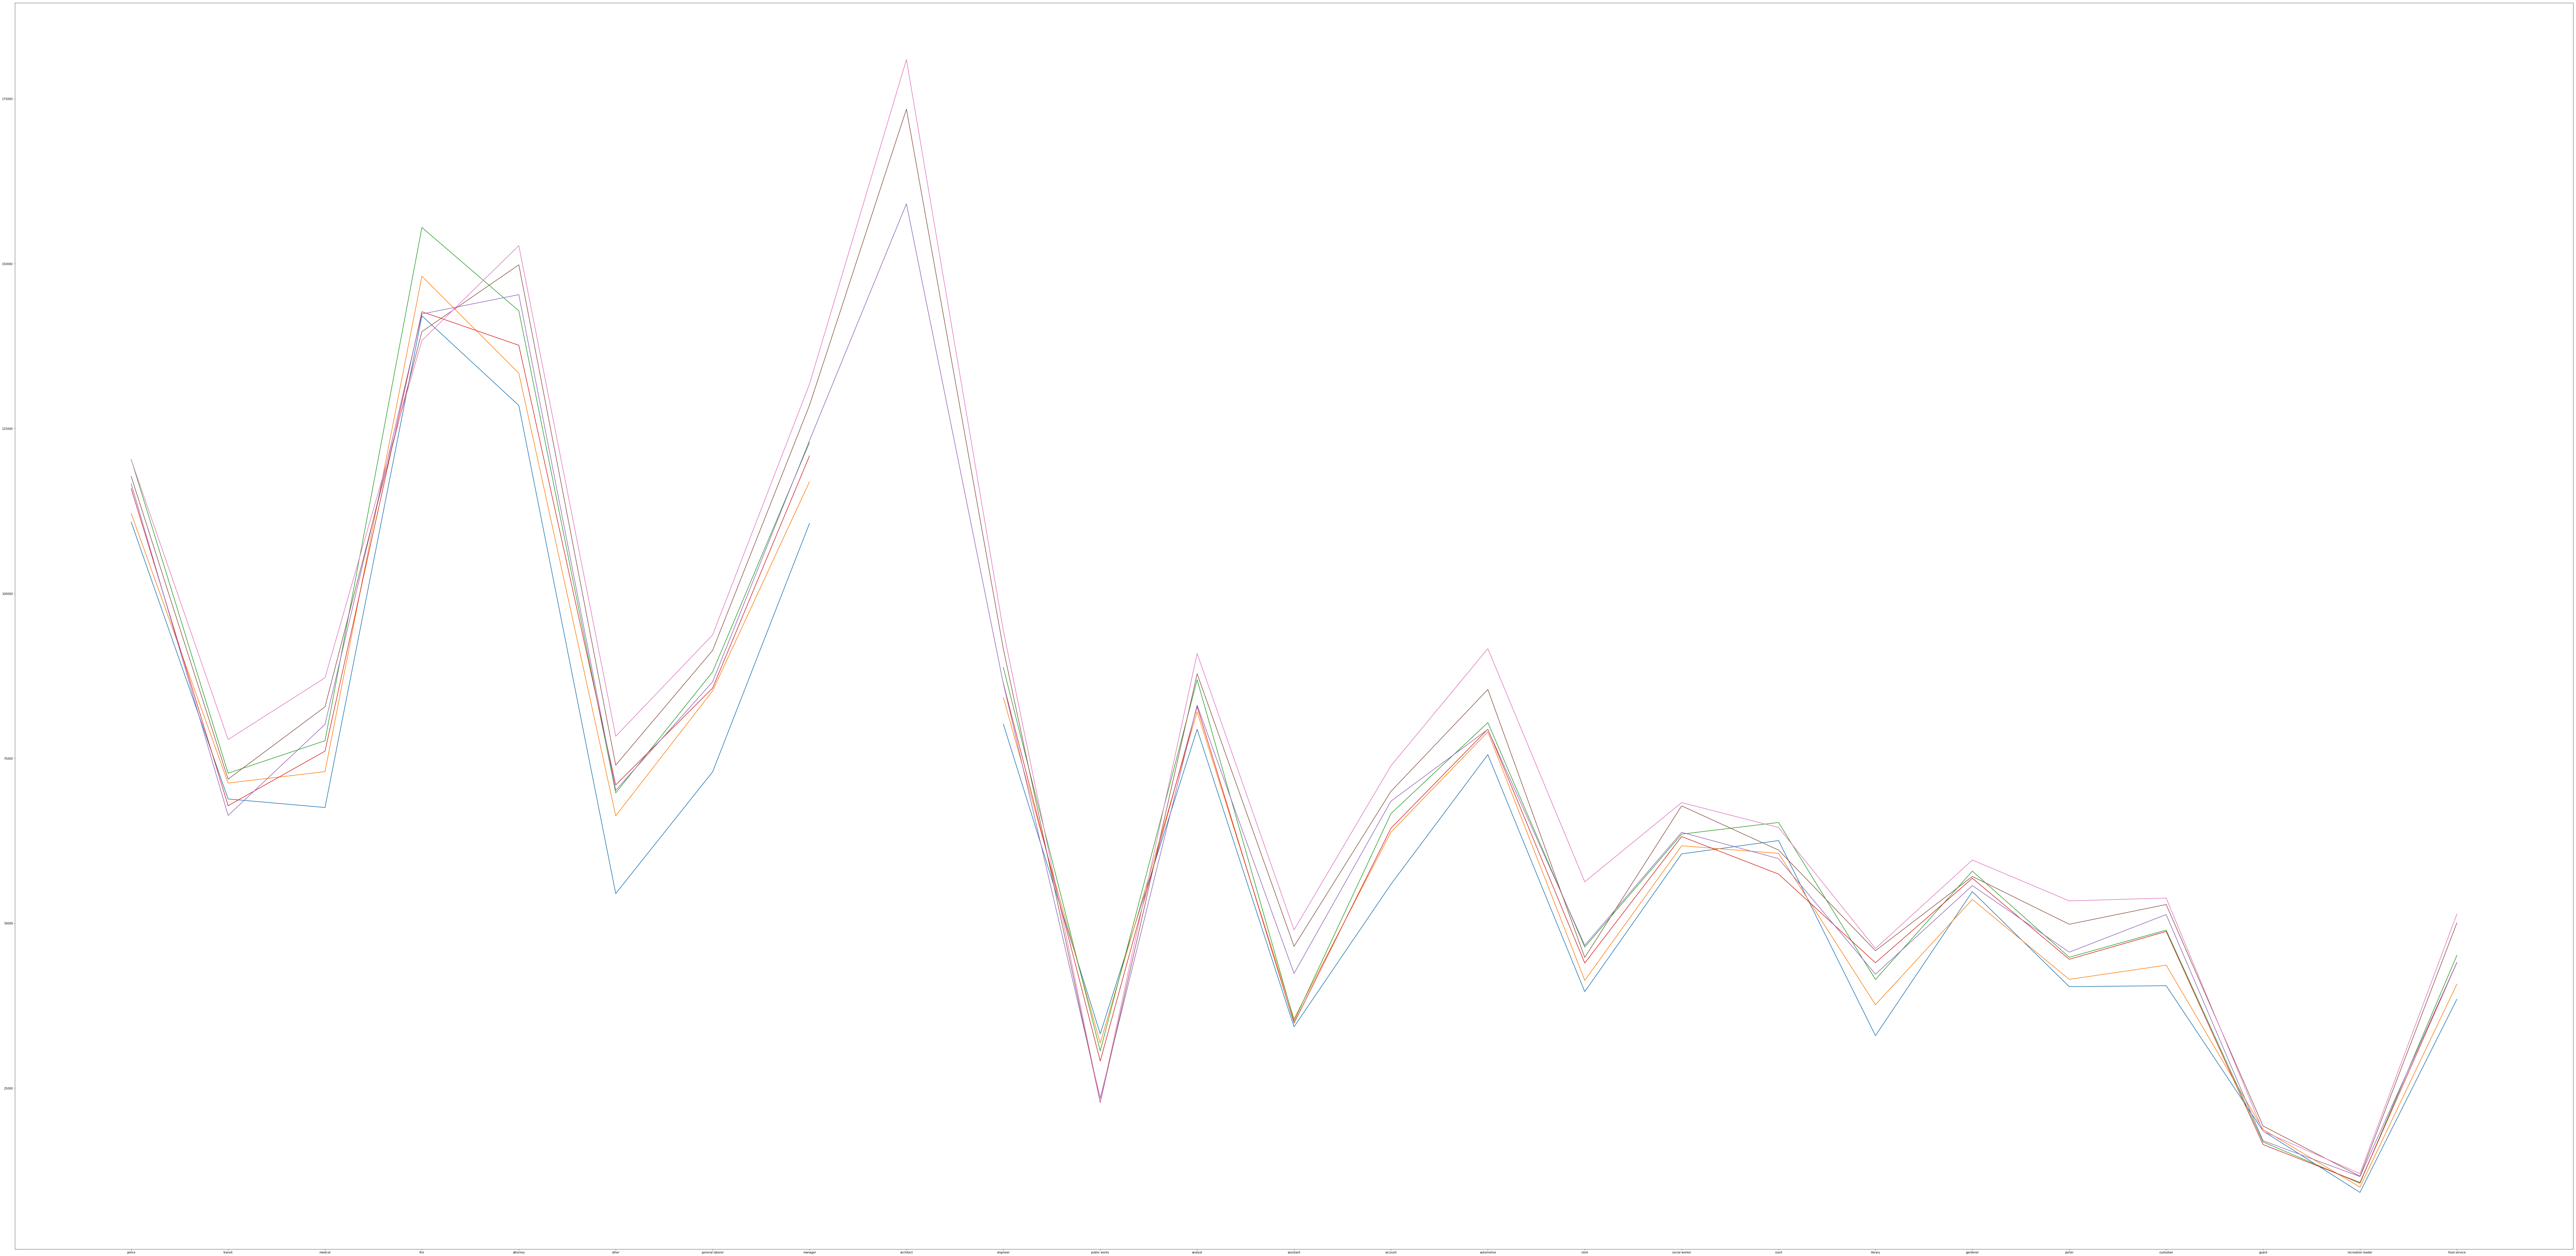

In [108]:
plt.figure(figsize=(160,80)) 
plt.plot(jobgroups, average_jobgroups2011, linewidth = 2.0)
plt.plot(jobgroups, average_jobgroups2012, linewidth = 2.0)
plt.plot(jobgroups, average_jobgroups2013, linewidth = 2.0)
plt.plot(jobgroups, average_jobgroups2014, linewidth = 2.0)
plt.plot(jobgroups, average_jobgroups2015, linewidth = 2.0)
plt.plot(jobgroups, average_jobgroups2016, linewidth = 2.0)
plt.plot(jobgroups, average_jobgroups2017, linewidth = 2.0)
plt.show()

We can compare these increases in pay in SF to the increases in pay in LA, and then use these values to compare to the effective rise in inflation, cost of living, and housing in these relative areas.

However, we will need to cleanup the LA data set first.

In [54]:
LA2011_salary_df = pd.read_csv("los-angeles-2011.csv", dtype={'EmployeeName':'object','JobTitle': 'object', "BasePay": 'object', "Overtime": 'object', 'Otherpay': 'object', 'Agency': 'object'})
LA2011_salary_df = LA2011_salary_df.drop(columns=['EmployeeName'])
LA2011_salary_df['JobTitle'] = LA2011_salary_df['JobTitle'].str.upper()

LA2012_salary_df = pd.read_csv("los-angeles-2012.csv", dtype={'EmployeeName':'object','JobTitle': 'object', "BasePay": 'object', "Overtime": 'object', 'Otherpay': 'object', 'Agency': 'object'})
LA2012_salary_df = LA2012_salary_df.drop(columns=['EmployeeName'])
LA2012_salary_df['JobTitle'] = LA2012_salary_df['JobTitle'].str.upper()

LA2013_salary_df = pd.read_csv("los-angeles-2013.csv", dtype={'EmployeeName':'object','JobTitle': 'object', "BasePay": 'object', "Overtime": 'object', 'Otherpay': 'object', 'Agency': 'object'})
LA2013_salary_df = LA2013_salary_df.drop(columns=['EmployeeName'])
LA2013_salary_df['JobTitle'] = LA2013_salary_df['JobTitle'].str.upper()

LA2014_salary_df = pd.read_csv("los-angeles-2014.csv", dtype={'EmployeeName':'object','JobTitle': 'object', "BasePay": 'object', "Overtime": 'object', 'Otherpay': 'object', 'Agency': 'object'})
LA2014_salary_df = LA2014_salary_df.drop(columns=['EmployeeName'])
LA2014_salary_df['JobTitle'] = LA2014_salary_df['JobTitle'].str.upper()

LA2015_salary_df = pd.read_csv("los-angeles-2015.csv", dtype={'EmployeeName':'object','JobTitle': 'object', "BasePay": 'object', "Overtime": 'object', 'Otherpay': 'object', 'Agency': 'object'})
LA2015_salary_df = LA2015_salary_df.drop(columns=['EmployeeName'])
LA2015_salary_df['JobTitle'] = LA2015_salary_df['JobTitle'].str.upper()

LA2016_salary_df = pd.read_csv("los-angeles-2016.csv", dtype={'EmployeeName':'object','JobTitle': 'object', "BasePay": 'object', "Overtime": 'object', 'Otherpay': 'object', 'Agency': 'object'})
LA2016_salary_df = LA2016_salary_df.drop(columns=['EmployeeName'])
LA2016_salary_df['JobTitle'] = LA2016_salary_df['JobTitle'].str.upper()

LA2017_salary_df = pd.read_csv("los-angeles-2017.csv", dtype={'EmployeeName':'object','JobTitle': 'object', "BasePay": 'object', "Overtime": 'object', 'Otherpay': 'object', 'Agency': 'object'})
LA2017_salary_df = LA2017_salary_df.drop(columns=['EmployeeName'])
LA2017_salary_df['JobTitle'] = LA2017_salary_df['JobTitle'].str.upper()

In [55]:
#Look at the prior SF cleanup for additional information regarding this code.
LA2011_salary_df = LA2011_salary_df.groupby('JobTitle').filter(lambda x: len(x) > 30)
LA2012_salary_df = LA2012_salary_df.groupby('JobTitle').filter(lambda x: len(x) > 30)
LA2013_salary_df = LA2013_salary_df.groupby('JobTitle').filter(lambda x: len(x) > 30)
LA2014_salary_df = LA2014_salary_df.groupby('JobTitle').filter(lambda x: len(x) > 30)
LA2015_salary_df = LA2015_salary_df.groupby('JobTitle').filter(lambda x: len(x) > 30)
LA2016_salary_df = LA2016_salary_df.groupby('JobTitle').filter(lambda x: len(x) > 30)
LA2017_salary_df = LA2017_salary_df.groupby('JobTitle').filter(lambda x: len(x) > 30)

In [56]:
#LA2012_salary_df["JobTitle"].value_counts().index.tolist()

In [67]:
print(LAaverageOther2011, LAaverageOther2012)

94566.831575179 99413.03373176658


CPI will help us understand inflation to compare the increase in wages relative to inflation and home price increases.

In [73]:
LAcpi_df = pd.read_csv("avgSFCPI.csv")
SFcpi_df = pd.read_csv("avgLACPI.csv")
#cpi_df = cpi_df.dropna()
#SFcpi_df

In [74]:
#turn sf cpi into percentages for inflation
sfCPI11 = ((SFcpi_df['AVERAGE BASKET'].iloc[1] - SFcpi_df['AVERAGE BASKET'].iloc[0]) / SFcpi_df['AVERAGE BASKET'].iloc[0]) * 100
sfCPI12 = ((SFcpi_df['AVERAGE BASKET'].iloc[2] - SFcpi_df['AVERAGE BASKET'].iloc[1]) / SFcpi_df['AVERAGE BASKET'].iloc[1]) * 100
sfCPI13 = ((SFcpi_df['AVERAGE BASKET'].iloc[3] - SFcpi_df['AVERAGE BASKET'].iloc[2]) / SFcpi_df['AVERAGE BASKET'].iloc[2]) * 100
sfCPI14 = ((SFcpi_df['AVERAGE BASKET'].iloc[4] - SFcpi_df['AVERAGE BASKET'].iloc[3]) / SFcpi_df['AVERAGE BASKET'].iloc[3]) * 100
sfCPI15 = ((SFcpi_df['AVERAGE BASKET'].iloc[4] - SFcpi_df['AVERAGE BASKET'].iloc[4]) / SFcpi_df['AVERAGE BASKET'].iloc[4]) * 100
sfCPI16 = ((SFcpi_df['AVERAGE BASKET'].iloc[5] - SFcpi_df['AVERAGE BASKET'].iloc[4]) / SFcpi_df['AVERAGE BASKET'].iloc[4]) * 100

In [75]:
#turn LA cpi into inflation %
laCPI11 = ((LAcpi_df['AVERAGE BASKET'].iloc[1] - LAcpi_df['AVERAGE BASKET'].iloc[0]) / LAcpi_df['AVERAGE BASKET'].iloc[0]) * 100
laCPI12 = ((LAcpi_df['AVERAGE BASKET'].iloc[2] - LAcpi_df['AVERAGE BASKET'].iloc[1]) / LAcpi_df['AVERAGE BASKET'].iloc[1]) * 100
laCPI13 = ((LAcpi_df['AVERAGE BASKET'].iloc[3] - LAcpi_df['AVERAGE BASKET'].iloc[2]) / LAcpi_df['AVERAGE BASKET'].iloc[2]) * 100
laCPI14 = ((LAcpi_df['AVERAGE BASKET'].iloc[4] - LAcpi_df['AVERAGE BASKET'].iloc[3]) / LAcpi_df['AVERAGE BASKET'].iloc[3]) * 100
laCPI15 = ((LAcpi_df['AVERAGE BASKET'].iloc[4] - LAcpi_df['AVERAGE BASKET'].iloc[4]) / LAcpi_df['AVERAGE BASKET'].iloc[4]) * 100
laCPI16 = ((LAcpi_df['AVERAGE BASKET'].iloc[5] - LAcpi_df['AVERAGE BASKET'].iloc[4]) / LAcpi_df['AVERAGE BASKET'].iloc[4]) * 100

In [76]:
medianHousing_df = pd.read_csv("medianHomes.csv", usecols=["Mon-Yr", "San Francisco", "Los Angeles"])
medianHousing_df = medianHousing_df.dropna()
medianHousing_df

#Strip '$ and ,' sign

medianHousing_df['San Francisco'] = medianHousing_df['San Francisco'].str.replace('$', '')
medianHousing_df['Los Angeles'] = medianHousing_df['Los Angeles'].str.replace('$', '')
medianHousing_df['San Francisco'] = medianHousing_df['San Francisco'].str.replace(',', '')
medianHousing_df['Los Angeles'] = medianHousing_df['Los Angeles'].str.replace(',', '')
medianHousing_df['Los Angeles'] = medianHousing_df['Los Angeles'].astype(int)
medianHousing_df['San Francisco'] = medianHousing_df['San Francisco'].astype(int)\

print(medianHousing_df)

    Mon-Yr  Los Angeles  San Francisco
0   Jan-11       305570         632936
1   Feb-11       286100         645454
2   Mar-11       282170         764535
3   Apr-11       290600         721311
4   May-11       271540         701922
5   Jun-11       301300         742646
6   Jul-11       317060         739753
7   Aug-11       312900         698629
8   Sep-11       330610         654850
9   Oct-11       307970         739918
10  Nov-11       291260         696917
11  Dec-11       306950         656609
12  Jan-12       290900         649999
13  Feb-12       272690         665492
14  Mar-12       272920         701171
15  Apr-12       286800         782738
16  May-12       282930         785714
17  Jun-12       315390         813559
18  Jul-12       334190         787791
19  Aug-12       344770         759615
20  Sep-12       373020         719339
21  Oct-12       364810         877155
22  Nov-12       337080         840277
23  Dec-12       367400         864795
24  Jan-13       349720  

In [77]:
medianSF11, medianSF12, medianSF13, medianSF14, medianSF15, medianSF16, medianSF17, medianSF18 = (0,0,0,0,0,0,0,0)
medianLA11, medianLA12, medianLA13, medianLA14, medianLA15, medianLA16, medianLA17, medianLA18 = (0,0,0,0,0,0,0,0)

for i in range(0,96):
    if i in range(0,12):
        medianSF11 += medianHousing_df['San Francisco'].iloc[i]
        medianLA11 += medianHousing_df['Los Angeles'].iloc[i]
    if i in range(12,24):
        medianSF12 += medianHousing_df['San Francisco'].iloc[i]
        medianLA12 += medianHousing_df['Los Angeles'].iloc[i]
    if i in range(24,36):
        medianSF13 += medianHousing_df['San Francisco'].iloc[i]
        medianLA13 += medianHousing_df['Los Angeles'].iloc[i]
    if i in range(36,48):
        medianSF14 += medianHousing_df['San Francisco'].iloc[i]
        medianLA14 += medianHousing_df['Los Angeles'].iloc[i]
    if i in range(48,60):
        medianSF15 += medianHousing_df['San Francisco'].iloc[i]
        medianLA15 += medianHousing_df['Los Angeles'].iloc[i]
    if i in range(60,72):
        medianSF16 += medianHousing_df['San Francisco'].iloc[i]
        medianLA16 += medianHousing_df['Los Angeles'].iloc[i]
    if i in range(72,84):
        medianSF17 += medianHousing_df['San Francisco'].iloc[i]
        medianLA17 += medianHousing_df['Los Angeles'].iloc[i]
    if i in range(84,96):
        medianSF18 += medianHousing_df['San Francisco'].iloc[i]
        medianLA18 += medianHousing_df['Los Angeles'].iloc[i]
        
medianSF11 = medianSF11 / 12
medianSF12 = medianSF12/ 12
medianSF13 = medianSF13 / 12
medianSF14 = medianSF14 / 12
medianSF15 = medianSF15 / 12
medianSF16 = medianSF16 / 12
medianSF17 = medianSF17 / 12
medianSF18 = medianSF18 / 12

medianLA11 = medianLA11 / 12
medianLA12 = medianLA12 / 12
medianLA13 = medianLA13 / 12
medianLA14 = medianLA14 / 12
medianLA15 = medianLA15 / 12
medianLA16 = medianLA16 / 12
medianLA17 = medianLA17 / 12
medianLA18 = medianLA18/ 12

In [78]:
increaseLA12 = ((medianLA12 - medianLA11) / medianLA11) * 100
medianHousing_df

,Mon-Yr,Los Angeles,San Francisco
0,Jan-11,305570,632936
1,Feb-11,286100,645454
2,Mar-11,282170,764535
3,Apr-11,290600,721311
4,May-11,271540,701922
5,Jun-11,301300,742646
6,Jul-11,317060,739753
7,Aug-11,312900,698629
8,Sep-11,330610,654850
9,Oct-11,307970,739918


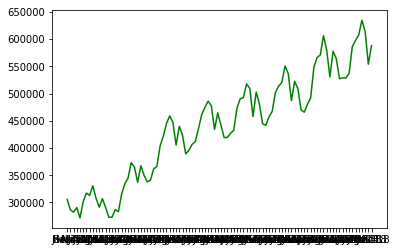

In [79]:
plt.plot(medianHousing_df["Mon-Yr"], medianHousing_df["Los Angeles"], color = 'g')
plt.show()

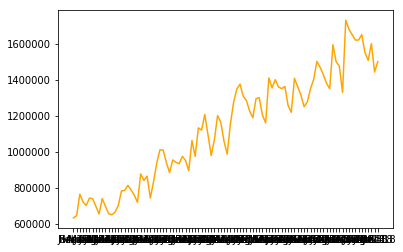

In [80]:
plt.plot(medianHousing_df["Mon-Yr"], medianHousing_df["San Francisco"], color='orange')
plt.show()

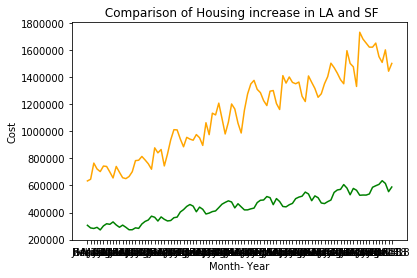

In [81]:
plt.plot(medianHousing_df["Mon-Yr"], medianHousing_df["Los Angeles"], color = 'g')
plt.plot(medianHousing_df["Mon-Yr"], medianHousing_df["San Francisco"], color='orange')
plt.xlabel('Month- Year')
plt.ylabel('Cost')
plt.title (' Comparison of Housing increase in LA and SF')
plt.show()

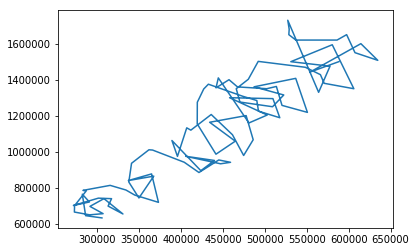

In [82]:
plt.plot(medianHousing_df["Los Angeles"], medianHousing_df["San Francisco"])
plt.show()